# Tree Algorithm Implementation
#### Cart Algorithm using Gini Impurity as a splitting Criterion

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import sys
sys.path.append("..")
import data_processing.train_test_split as split
from models import classification_tree as tree
iris = load_iris()
X, y = iris.data, iris.target
tree_iris = tree.ClassificationTree()

X_train, X_test, y_train, y_test = split.train_test_split(X, y, seed=2108)
print("Training set size: ", X_train.shape[0])
print("Test set size: ", X_test.shape[0])

Training set size:  113
Test set size:  37


In [2]:
tree_iris.fit(X_train, y_train)
tree_iris.print_tree(feature_names = iris.feature_names)
depth = tree_iris.get_depth()
print("Depth :", depth)

petal length (cm) <= 3.0
Left:
|   --> Class: 0.0
Right:
|   petal length (cm) <= 5.0
|   Left:
|   |   petal width (cm) <= 1.7
|   |   Left:
|   |   |   --> Class: 1.0
|   |   Right:
|   |   |   sepal width (cm) <= 3.2
|   |   |   Left:
|   |   |   |   --> Class: 2.0
|   |   |   Right:
|   |   |   |   --> Class: 1.0
|   Right:
|   |   sepal length (cm) <= 6.1
|   |   Left:
|   |   |   sepal length (cm) <= 6.0
|   |   |   Left:
|   |   |   |   --> Class: 2.0
|   |   |   Right:
|   |   |   |   sepal width (cm) <= 2.7
|   |   |   |   Left:
|   |   |   |   |   --> Class: 2.0
|   |   |   |   Right:
|   |   |   |   |   --> Class: 1.0
|   |   Right:
|   |   |   --> Class: 2.0
Depth : 5


In [3]:
predictions = tree_iris.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.972972972972973


Max Depth: 1, Actual Depth: 1,  Accuracy: 0.5945945945945946
Max Depth: 2, Actual Depth: 2,  Accuracy: 0.918918918918919
Max Depth: 3, Actual Depth: 3,  Accuracy: 0.972972972972973
Max Depth: 4, Actual Depth: 4,  Accuracy: 0.972972972972973
Max Depth: 5, Actual Depth: 5,  Accuracy: 0.972972972972973
Max Depth: 6, Actual Depth: 5,  Accuracy: 0.972972972972973
Max Depth: 7, Actual Depth: 5,  Accuracy: 0.972972972972973
Max Depth: 8, Actual Depth: 5,  Accuracy: 0.972972972972973
Max Depth: 9, Actual Depth: 5,  Accuracy: 0.972972972972973
Max Depth: 10, Actual Depth: 5,  Accuracy: 0.972972972972973


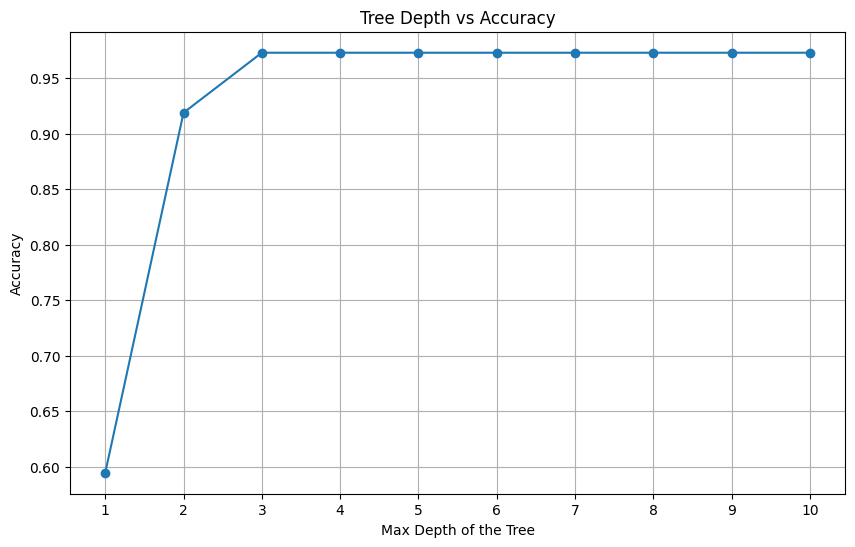

In [4]:
import matplotlib.pyplot as plt

# List to store the accuracies
accuracies = []

# Loop over the range of depths
for depth in range(1, 11):
    tree_depth_test = tree.ClassificationTree(max_depth=depth, min_size=1)
    tree_depth_test.fit(X_train, y_train)
    predictions = tree_depth_test.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)
    print(f"Max Depth: {depth}, Actual Depth: {tree_depth_test.get_depth()},  Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Tree Depth vs Accuracy')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [5]:
iono = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",")
X_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=np.arange(34))
y_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=34, dtype="int")
X_train_io, X_test_io, y_train_io, y_test_io = split.train_test_split(X_io, y_io, seed=2108)
print("Training set size: ", X_train_io.shape[0])
print("Test set size: ", X_test_io.shape[0])

Training set size:  264
Test set size:  87


In [6]:
tree_iono = tree.ClassificationTree()
tree_iono.fit(X_train_io, y_train_io)
tree_iono.print_tree()
depth = tree_iono.get_depth()
print("Depth :", depth)

X[4] <= 0.04198
Left:
|   --> Class: 0.0
Right:
|   X[26] <= 1.0
|   Left:
|   |   X[2] <= 0.19466
|   |   Left:
|   |   |   --> Class: 0.0
|   |   Right:
|   |   |   X[7] <= -0.85741
|   |   |   Left:
|   |   |   |   X[5] <= -0.36156
|   |   |   |   Left:
|   |   |   |   |   --> Class: 1.0
|   |   |   |   Right:
|   |   |   |   |   --> Class: 0.0
|   |   |   Right:
|   |   |   |   X[2] <= 0.4375
|   |   |   |   Left:
|   |   |   |   |   X[23] <= 0.16364
|   |   |   |   |   Left:
|   |   |   |   |   |   --> Class: 1.0
|   |   |   |   |   Right:
|   |   |   |   |   |   --> Class: 0.0
|   |   |   |   Right:
|   |   |   |   |   X[9] <= -0.51171
|   |   |   |   |   Left:
|   |   |   |   |   |   --> Class: 0.0
|   |   |   |   |   Right:
|   |   |   |   |   |   X[23] <= -0.94172
|   |   |   |   |   |   Left:
|   |   |   |   |   |   |   --> Class: 0.0
|   |   |   |   |   |   Right:
|   |   |   |   |   |   |   X[5] <= -0.2963
|   |   |   |   |   |   |   Left:
|   |   |   |   |   |   |   |   X[

In [7]:
predictions = tree_iono.predict(X_test_io)
accuracy = np.mean(predictions == y_test_io)
print("Accuracy: ", accuracy)

Accuracy:  0.8850574712643678


Max Depth: 2, Actual Depth: 2, Accuracy: 0.9080459770114943
Max Depth: 3, Actual Depth: 3, Accuracy: 0.9195402298850575
Max Depth: 4, Actual Depth: 4, Accuracy: 0.896551724137931
Max Depth: 5, Actual Depth: 5, Accuracy: 0.9195402298850575
Max Depth: 6, Actual Depth: 6, Accuracy: 0.9080459770114943
Max Depth: 7, Actual Depth: 7, Accuracy: 0.896551724137931
Max Depth: 8, Actual Depth: 8, Accuracy: 0.896551724137931
Max Depth: 9, Actual Depth: 9, Accuracy: 0.896551724137931
Max Depth: 10, Actual Depth: 10, Accuracy: 0.896551724137931
Max Depth: 11, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 12, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 13, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 14, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 15, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 16, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 17, Actual Depth: 11, Accuracy: 0.8850574712643678
Max Depth: 18, Actual Depth: 

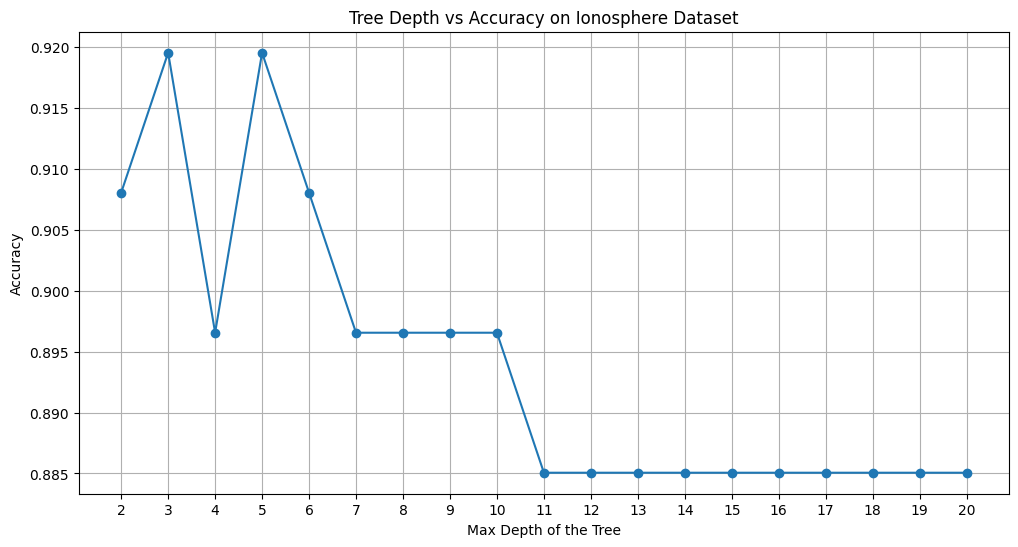

In [8]:
# List to store accuracies
accuracies = []

# Loop over the range of depths from 2 to 20
for depth in range(2, 21):
    tree_iono_test = tree.ClassificationTree(max_depth=depth, min_size=1)
    tree_iono_test.fit(X_train_io, y_train_io)
    predictions = tree_iono_test.predict(X_test_io)
    accuracy = np.mean(predictions == y_test_io)
    accuracies.append(accuracy)
    print(f"Max Depth: {depth}, Actual Depth: {tree_iono_test.get_depth()}, Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), accuracies, marker='o', linestyle='-')
plt.title('Tree Depth vs Accuracy on Ionosphere Dataset')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('Accuracy')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

In [9]:
tree_iono_five = tree.ClassificationTree(max_depth=5)
tree_iono_five.fit(X_train_io, y_train_io)
tree_iono_five.print_tree()

X[4] <= 0.04198
Left:
|   --> Class: 0.0
Right:
|   X[26] <= 1.0
|   Left:
|   |   X[2] <= 0.19466
|   |   Left:
|   |   |   --> Class: 0.0
|   |   Right:
|   |   |   X[7] <= -0.85741
|   |   |   Left:
|   |   |   |   X[5] <= -0.36156
|   |   |   |   Left:
|   |   |   |   |   --> Class: 1.0
|   |   |   |   Right:
|   |   |   |   |   --> Class: 0.0
|   |   |   Right:
|   |   |   |   X[2] <= 0.4375
|   |   |   |   Left:
|   |   |   |   |   --> Class: 1.0
|   |   |   |   Right:
|   |   |   |   |   --> Class: 1.0
|   Right:
|   |   X[28] <= 0.95603
|   |   Left:
|   |   |   --> Class: 0.0
|   |   Right:
|   |   |   X[3] <= -0.49311
|   |   |   Left:
|   |   |   |   --> Class: 0.0
|   |   |   Right:
|   |   |   |   X[5] <= -0.05558
|   |   |   |   Left:
|   |   |   |   |   --> Class: 0.0
|   |   |   |   Right:
|   |   |   |   |   --> Class: 1.0


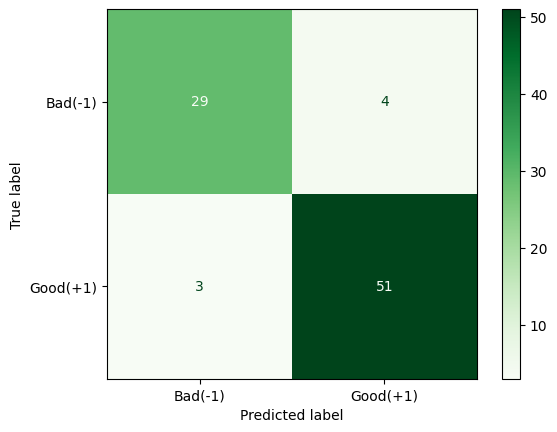

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions_five = tree_iono_five.predict(X_test_io)
conf_mat = confusion_matrix(y_test_io, predictions_five)

labels = ["Bad(-1)", "Good(+1)"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
disp.plot(cmap=plt.cm.Greens)  
plt.show()